# EDA technical challenge

## Import libraries and data

In [188]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [171]:
df_raw = pd.read_csv('technical_challenge_data/Melbourne_housing_FULL.csv')

## Challenges

In [172]:
# 1. Calculate the % of data that will be lost by removing null values from the price column. 
print(f"the % of null values in the price column is: {100*df_raw.Price.isna().sum()/df_raw.Price.size:.2f}%")

the % of null values in the price column is: 21.83%


In [173]:
# 1. cast price as int and remove null values.
df = df_raw.copy()
df = df.dropna(subset=['Price'])
df['Price'] = df.Price.astype(int)

In [174]:
# 2. most common type of property
most_common_types = df['Type'].value_counts().sort_values(ascending=False).reset_index()

print(f"the most common type is {most_common_types.Type.iloc[0]}")
print(f"It occurs {most_common_types['count'].iloc[0]} times. \nThis is {most_common_types['count'].iloc[0]/most_common_types['count'].sum()*100:.2f}% of the data.")

the most common type is h
It occurs 18472 times. 
This is 67.79% of the data.


<Axes: xlabel='Type', ylabel='count'>

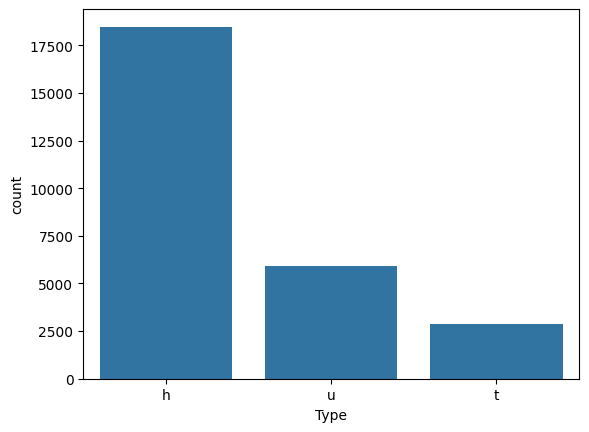

In [175]:
# 3. chart to show the frequency of each property type in descending order. 

sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)

<Axes: xlabel='Rooms', ylabel='Price'>

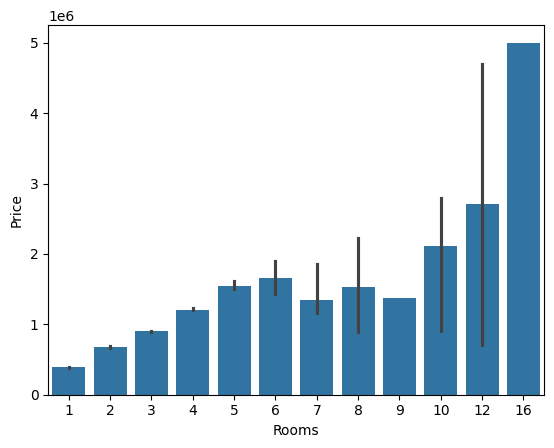

In [176]:
# 4. how does the number of rooms affect the median price? 
# represent this using a bar chart. 

sns.barplot(data=df, x='Rooms', y='Price', estimator='median')

In [177]:
# 5. use a non-parametric correlation coefficient (Spearman correlation coefficient) to determine the strength of the correlation.

# Calculating the Spearman rank correlation between 'Price' and 'Rooms' 
correlation = df['Price'].corr(df['Rooms'], method='spearman')
correlation

#the variables are moderated positively correlated.

np.float64(0.5042971590926004)

np.float64(-0.21138434279158308)

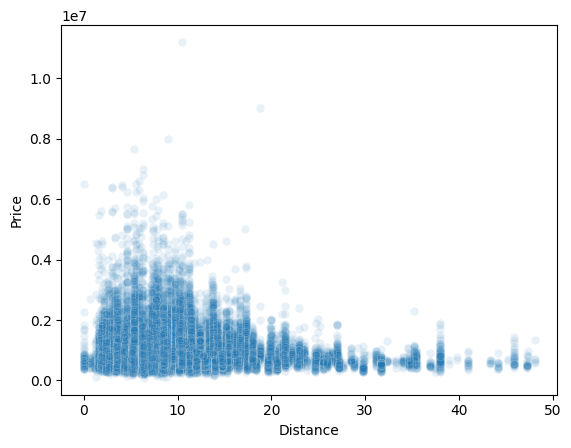

In [178]:
# 6. is there a relationship between the distance from Central Business District and the property price? 
# use a scatter plot. 

sns.scatterplot(data=df, x='Distance', y='Price', alpha=0.1)
correlation = df['Distance'].corr(df['Price'])
correlation


np.float64(0.10075363947310159)

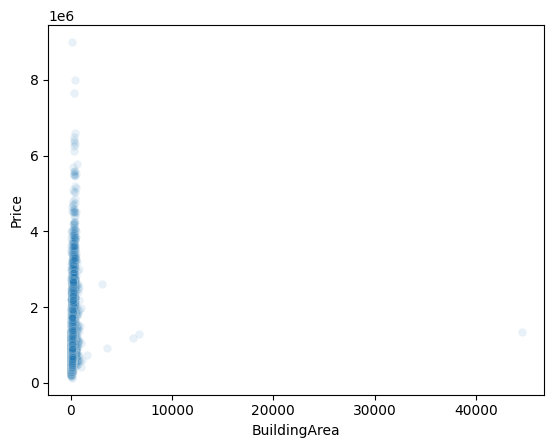

In [179]:
# 7. is there a relation between size and price?
sns.scatterplot(data=df, x='BuildingArea', y='Price', alpha=0.1)
correlation = df['BuildingArea'].corr(df['Price'])
correlation

np.float64(0.5103874538711591)

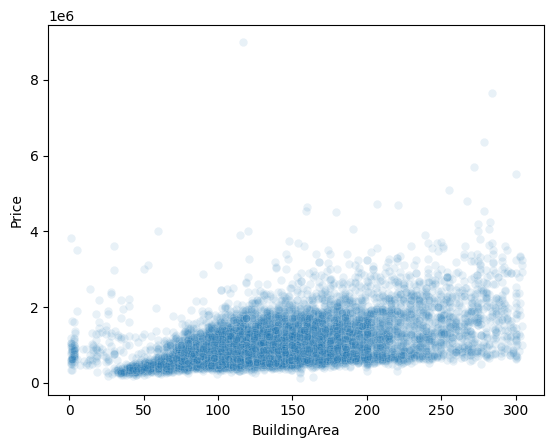

In [180]:
# there seems to be a relationship. But there are huge outliers in the Building area colums. 
# Also: there are some null and 0 values that should be removed.
# if we filter these out, the relation becomes more evident. 


def filter_tukeys_test_outliers(data, metric):
    Q1 = data[metric].quantile(0.25)
    Q3 = data[metric].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers    
    return data[(data[metric] > lower_bound) & (data[metric] < upper_bound)]

df_clean = df.copy()
df_clean = df_clean.dropna(subset=['BuildingArea'])
df_clean = df_clean[df_clean['BuildingArea'] > 0]

df_clean = filter_tukeys_test_outliers(df_clean, 'BuildingArea')

sns.scatterplot(data=df_clean, x='BuildingArea', y='Price', alpha=0.1)
correlation2 = df_clean['BuildingArea'].corr(df_clean['Price'])
correlation2

# Still the value of the coefficient indicates that the correlation is moderate. 

<Axes: xlabel='Landsize', ylabel='Price'>

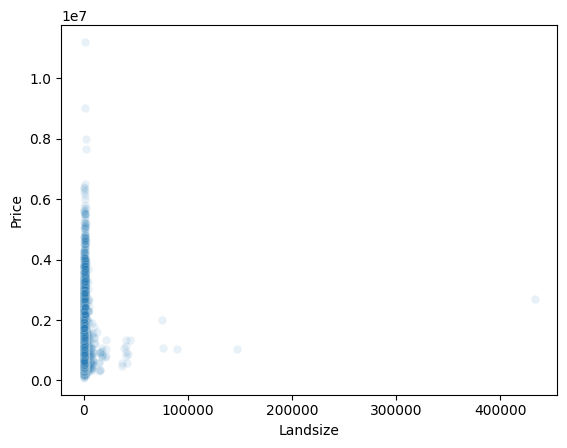

In [181]:
# 8. relation between land size and property price

sns.scatterplot(data=df, x='Landsize', y='Price', alpha=0.1)

<Axes: xlabel='Price', ylabel='Landsize_q'>

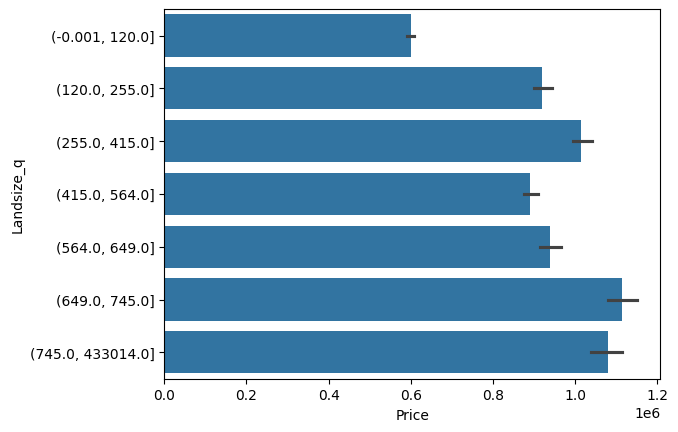

In [182]:
# 8. use a quantile based discretization function to categorise the Landsize variable.

df['Landsize_q'] = pd.qcut(df['Landsize'], q=7)

# use a barchart to represent the relationship between Landsize and Price. 

sns.barplot(data=df, y='Landsize_q', x='Price', estimator='median') 

<Axes: xlabel='Price'>

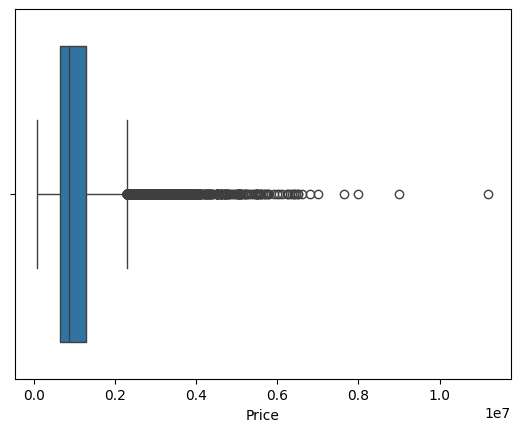

In [183]:
# 9. does the df contain properties that are priced significantly above or below average?
# create a boxplot. 

sns.boxplot(data=df, x='Price')

# yes there seems to be high outliers. 



<Axes: xlabel='Price'>

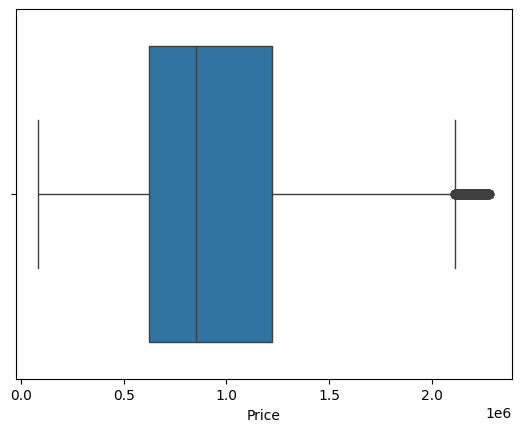

In [184]:
# We can filter out the price outliers. 

df_clean = df.copy()
df_clean = filter_tukeys_test_outliers(df_clean, 'Price')

sns.boxplot(data=df_clean, x='Price')

In [185]:
# percentaje of outliers: 
(len(df) - len(df_clean)) / len(df) * 100

4.71244540683378

the skew value is:  0.8588212983646799
the kurtosis value is:  0.12267060490078663


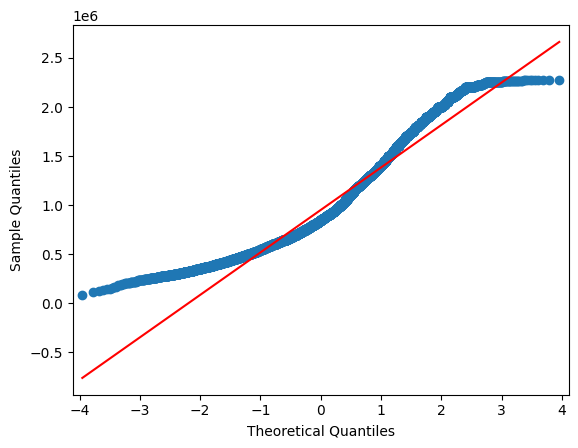

In [193]:
# 10. what is the distribution of the property prices? Create a QQ Plot to compare with the normal distribution. 
# Generating a Q-Q plot for 'Price' to check if its distribution follows a normal distribution
sm.qqplot(df_clean['Price'], line='s')

print("the skew value is: ", df_clean['Price'].skew())
print("the kurtosis value is: ", df_clean['Price'].kurt())

In [194]:
# 11. Conducting the Kolmogorov-Smirnov test for normality on 'SalePrice'
# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
from scipy import stats

standardized_saleprice = (df_clean['Price'] - df['Price'].mean()) / df['Price'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

# the p_value < 0.05, so we reject the null hypothesis. The distribution is not normal. 

(np.float64(0.16780623390792815), np.float64(0.0))

<Axes: xlabel='Type', ylabel='Price'>

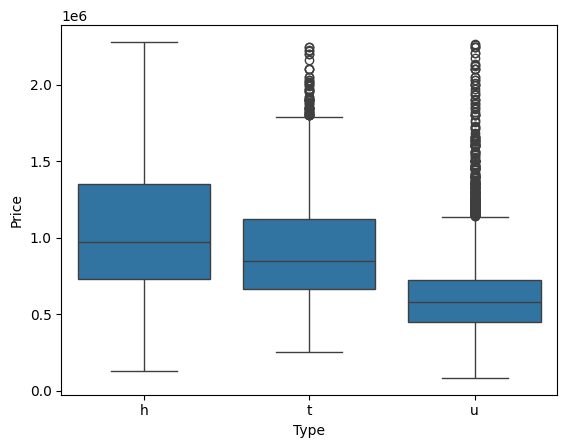

In [195]:
# 12. Create a box plot to show the distribution of property prices for each property type.

sns.boxplot(data=df_clean, x='Type', y='Price')

# the median value is higher for house than apartment.

In [199]:
# 13. What is the region with the highest average property price?

print("the highest median price occurs in:\n ", df_clean.groupby('Regionname')['Price'].mean().sort_values(ascending=False).head(1))
print("the cheapest median price occurs in:\n ", df_clean.groupby('Regionname')['Price'].mean().sort_values(ascending=True).head(1))

the highest median price occurs in:
  Regionname
Southern Metropolitan    1.158146e+06
Name: Price, dtype: float64
the cheapest median price occurs in:
  Regionname
Western Victoria    432606.770833
Name: Price, dtype: float64


<Axes: xlabel='Regionname', ylabel='Price'>

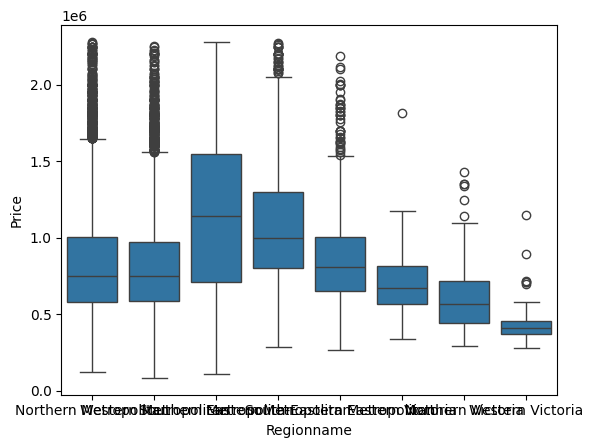

In [202]:
# 14. is there a statistically significant difference in property prices between regions?
# let's plot the data. 
sns.boxplot(data=df_clean, x='Regionname', y='Price')

In [203]:
# use a chisquare test to assess the dependence between price and regions. 
from scipy.stats import chi2_contingency

crosstab_result = pd.crosstab(df_clean['Regionname'], df_clean['Price'])
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

# p_value < 0.05 indicates that the dependence is significant. 

(np.float64(23015.9609303897), np.float64(2.191600099495921e-169))

In [204]:
# Use the "cramer" method to assess the association between variables in 'crosstab_result'

from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

# the value indicates a strong association. 

0.3558878748342637

In [222]:
# 15. How much was the percentage incrase in property median price between the earliest and the latest year of the df?
df_clean.Date = pd.to_datetime(df_clean.Date, format = '%d/%m/%Y')
df_clean.Date.min(), df_clean.Date.max()
df_clean['Year'] = df_clean['Date'].dt.year

median_prices_by_year = df_clean.groupby('Year')['Price'].median().sort_index().reset_index()

print(f"the % increase in price was: {(median_prices_by_year.Price.iloc[-1]-median_prices_by_year.Price.iloc[0])*100 / median_prices_by_year.Price.iloc[0]:.2f}%")

the % increase in price was: -3.88%


In [227]:
# 16. Is there a specific month during wich more houses are sold?

df_clean['Month'] = df_clean['Date'].dt.month

df_clean[df_clean['Type']=='h'].groupby('Month')['Price'].count().sort_values(ascending=False).head(1)

# more houses are sold in novermber. 

Month
11    2146
Name: Price, dtype: int64